In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np

# Linear Regression

### Contents
**Topics**
* Regression
    * Simple Regression
    * Multiple Regression
        * Feature Scaling

* Polynomial
    * Model selection
    * Underfitting - Overfitting
    * Regularization
    

**Coding**
* Scikit-learn
* Hands-on Implementation
    * Nomal Equation
    * Gradient Descent
* Pytorch

In [2]:
def z_score_norm(x):
    mean = x.mean(axis=0)
    std = x.std(axis=0)
    return (x- mean) / std

def mse_loss(pred, target, n_sample):
    error = pred - target
    loss = error.T.dot(error) / (2 * n_sample)
    return loss

def load_dataset_fire_and_theft(path_datasets):
    with open(path_datasets) as f:
        lines = [line.strip().split('\t')for line in f]
    x = []
    y = []

    for i in range(1, len(lines)):
        x.append(list(map(float, lines[i][:-1])))
        y.append(float(lines[i][-1]))

    x = np.array(x)
    y = np.array(y)
    return x, y

def plot_result(x, y, y_, title='linear regressoin'):
    plt.figure()
    plt.plot(x, y, 'ro', label='Original data')
    plt.plot(x, y_, label='Fitted line')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('scikit-learn')
    plt.show()

In [3]:
# dataset for simple regression
data1_x, data1_y = load_dataset_fire_and_theft('datasets/fire_and_theft.txt')
print('fire_and_theft dataset x: {}, y: {}'.format(data1_x.shape, data1_y.shape))

# dataset for multiple regression
boston = datasets.load_boston()
data2_x = boston.data
data2_y = boston.target

print('        boston dataset x: {}, y: {}'.format(data2_x.shape, data2_y.shape))

fire_and_theft dataset x: (42, 1), y: (42,)
        boston dataset x: (506, 13), y: (506,)


## Normal Equation

loss: 232.62575885543447
coefficient: [[2.16829786]]


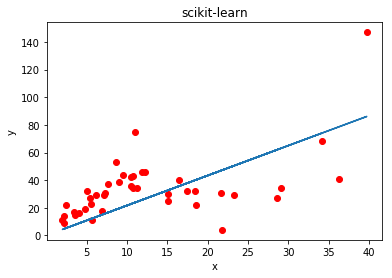

In [4]:
import numpy as np
from numpy.linalg import inv

def normal_equation(X, Y):
    weight = inv(X.T.dot(X)).dot(X.T).dot(Y)
    return weight

x_train = data1_x
y_train = data1_y
n_sample, n_feature = x_train.shape

theta = normal_equation(x_train, y_train[:, np.newaxis])
y_ = np.matmul(x_train, theta) 

print('loss:', mse_loss(np.squeeze(y_), y_train, n_sample))
print('coefficient:', theta)
plot_result(x_train, y_train, y_, title='scikit-learn')

## Gradeint Descent
### 1. Numerical Analysis Method
#### 1.1 Meaning of the Gradient

In [5]:
# prerequisite
def numerical_gradient(f, weight):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(weight)
    num_row, num_col = weight.shape
    
    for ridx in range(num_row):
        for cidx in range(num_col):
            tmp_val = weight[ridx, cidx]

            # f(x+h)
            weight[ridx, cidx] = tmp_val + h
            fxh1 = f(weight) 

            # f(x-h)
            weight[ridx, cidx] = tmp_val - h 
            fxh2 = f(weight) 
            grad[ridx, cidx] = (fxh1 - fxh2) / (2*h)
            weight[ridx, cidx] = tmp_val
        
    return grad

def numerical_diff(func, x):
    '''
    numerical differentiation
    '''
    h = 1e-4
    return (func(x+h) - func(x-h)) / (2*h)


# ------------ #
# sanity check #
# ------------ #

# 0.01x^2 + 0.1x  
func1 = lambda x: 0.01 * (x**2) + 0.1 * x
dy = numerical_diff(func1, 5)
print(dy)

# x0^2 + x1^2
func2 = lambda x: (x[0][0]**2) +(x[0][1]**2) 
dy = numerical_gradient(func2, np.array([[3.0, 4.0]]))
print(dy)

0.1999999999990898
[[6. 8.]]


#### 1.2 Numerical Analysis Method on Simple Regression

Epoch [1/100] Loss: 825.8333 | Gradient: [[-547.16428572]], theta: [[0.54716429]]
Epoch [2/100] Loss: 564.2196 | Gradient: [[-409.08881126]], theta: [[0.9562531]]
Epoch [3/100] Loss: 417.9815 | Gradient: [[-305.85632116]], theta: [[1.26210942]]
Epoch [100/100] Loss: 232.6258 | Gradient: [[0.]], theta: [[2.16829786]]
loss: [[232.62575886]]
coefficient: [[2.16829786]]


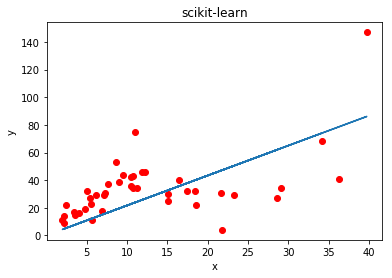

In [6]:
# hyper-parameter for training
num_epochs = 100
learning_rate = 0.001

x_train = data1_x 
y_train = data1_y
n_samples, n_features = x_train.shape

# input arrangement
x_train = x_train.transpose(1, 0)
y_train = y_train[:, np.newaxis]

# print(x_train.shape, y_train.shape) # (13, 506) (506, 1)

# training
theta = np.array(np.zeros((n_features, 1)))

def regression(theta):
    h = theta.T.dot(x_train)
    error = h.T - y_train
    loss = error.T.dot(error) / (2 * n_samples)
    return loss

for epoch in range(num_epochs):
    loss = regression(theta)
    gradient = numerical_gradient(regression, theta)
    theta = theta - learning_rate * gradient
    if (epoch+1) % num_epochs//4 == 0:
        print('Epoch [{}/{}] Loss: {:.4f} | Gradient: {}, theta: {}'
               .format(epoch+1, num_epochs, loss[0][0], gradient, theta))
        
# testing
y_ = theta.T.dot(x_train).T
    
print('loss:',  loss)
print('coefficient:', theta)
plot_result(x_train.T, y_train, y_, title='gradient descent')

### 2. Differentiation Method

#### 2.1 Simple Regression

Epoch [25/100] Loss: 232.6263 | Gradient: [[-0.50923044]], theta: [[2.16678911]]
Epoch [50/100] Loss: 232.6258 | Gradient: [[-0.00035433]], theta: [[2.16829681]]
Epoch [75/100] Loss: 232.6258 | Gradient: [[-2.46551259e-07]], theta: [[2.16829786]]
Epoch [100/100] Loss: 232.6258 | Gradient: [[-1.71548024e-10]], theta: [[2.16829786]]
loss: [[232.62575886]]
coefficient: [[2.16829786]]


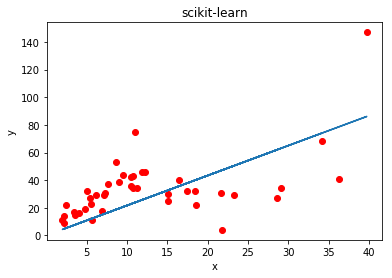

In [7]:
# hyper-parameter for training
num_epochs = 100
learning_rate = 0.001

x_train = data1_x 
y_train = data1_y
n_samples, n_features = x_train.shape

# input arrangement
x_train = x_train.transpose(1, 0)
y_train = y_train[:, np.newaxis]

# print(x_train.shape, y_train.shape) # (13, 506) (506, 1)

# training
theta = np.array(np.zeros((n_features, 1)))

for epoch in range(num_epochs):
    h = theta.T.dot(x_train)
    error = h.T - y_train
    loss = error.T.dot(error) / (2 * n_samples)
    gradient = x_train.dot(error) / n_samples
    theta = theta - learning_rate * gradient
    if (epoch+1) % (num_epochs//4) == 0:
        print('Epoch [{}/{}] Loss: {:.4f} | Gradient: {}, theta: {}'
               .format(epoch+1, num_epochs, loss[0][0], gradient, theta))
        
# testing
y_ = theta.T.dot(x_train).T
    
print('loss:',  loss)
print('coefficient:', theta)
plot_result(x_train.T, y_train, y_, title='gradient descent')

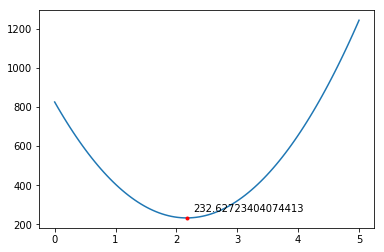

In [8]:
theta_list = np.linspace(0, 5, 100)
loss_list = []
for theta in theta_list:  
    h = np.array([[theta]]).T.dot(x_train)
    error = h.T - y_train
    loss = error.T.dot(error) / (2 * n_samples)
    loss_list.append(loss[0][0])
    
# plot
loc, val = np.argmin(loss_list), np.min(loss_list)
fig = plt.figure()
plt.plot(theta_list, loss_list)
plt.plot([theta_list[loc]], [val], marker='o', markersize=3, color="red")
plt.text(theta_list[loc]+0.1, val+30, str(val))
plt.show()

#### 2.2 Multiple Regression

In [9]:
# 表格

In [10]:
# hyper-parameter for training
num_epochs = 20000
learning_rate = 0.005

# x_train = data2_x
x_train = z_score_norm(data2_x)
y_train = data2_y
n_samples, n_features = x_train.shape

# normal equation
theta_ne = normal_equation(x_train, y_train)

# input arrangement
x_train = x_train.transpose(1, 0)
y_train = y_train[:, np.newaxis]
# print(x_train.shape, y_train.shape) # (13, 506) (506, 1)

# training
theta = np.array(np.zeros((n_features, 1)))

for epoch in range(num_epochs):
    h = theta.T.dot(x_train)
    error = h.T - y_train
    loss = error.T.dot(error) / (2 * n_samples)
    gradient = x_train.dot(error) / n_samples
    theta = theta - learning_rate * gradient
    if (epoch+1) % (num_epochs//4) == 0:
        print('Epoch [{}/{}] Loss: {:.4f}'
               .format(epoch+1, num_epochs, loss[0][0]))
        
# testing
y_ = theta.T.dot(x_train).T

error = y_ - y_train
loss = error.T.dot(error) / (2 * n_samples)

print('loss:', loss)
print('coefficient:\n', theta)
print('coefficient (normal equation):\n', theta_ne[:, np.newaxis])

Epoch [5000/20000] Loss: 264.8264
Epoch [10000/20000] Loss: 264.8117
Epoch [15000/20000] Loss: 264.8111
Epoch [20000/20000] Loss: 264.8111
loss: [[264.81109711]]
coefficient:
 [[-0.92787538]
 [ 1.08109199]
 [ 0.1394211 ]
 [ 0.68195131]
 [-2.05646117]
 [ 2.67449858]
 [ 0.01923898]
 [-3.10415198]
 [ 2.65848627]
 [-2.07253941]
 [-2.06046881]
 [ 0.84924213]
 [-3.74348322]]
coefficient (normal equation):
 [[-0.92814606]
 [ 1.08156863]
 [ 0.1409    ]
 [ 0.68173972]
 [-2.05671827]
 [ 2.67423017]
 [ 0.01946607]
 [-3.10404426]
 [ 2.66221764]
 [-2.07678168]
 [-2.06060666]
 [ 0.84926842]
 [-3.74362713]]


## Scikit-learn

loss: 180.41007820655116
coefficient: [1.313456]


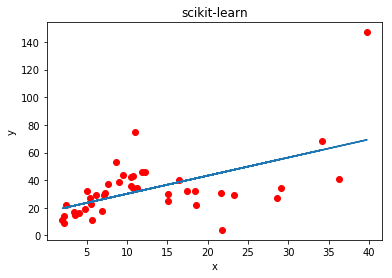

In [11]:
from sklearn import linear_model


# ------ #
# Data 1 #
# ------ #
x_train = data1_x
y_train = data1_y

# ------ #
# Data 2 #
# ------ #
# x_train = z_score_norm(data2_x)
# y_train = data2_y

# --- #
n_sample, n_feature = x_train.shape

model = linear_model.LinearRegression()
model.fit(x_train, y_train)
y_ = model.predict(x_train)


print('loss:', mse_loss(y_, y_train, n_sample))
print('coefficient:', model.coef_)
plot_result(x_train, y_train, y_, title='scikit-learn')

## Pytorch

In [12]:
import torch
import torch.nn as nn

# hyper-parameter for training

# ------ #
# Data 1 #
# ------ #
num_epochs = 100
learning_rate = 0.001

x_train = data1_x
y_train = data1_y

# ------ #
# Data 2 #
# ------ #
# num_epochs = 20000
# learning_rate = 0.005

# x_train = z_score_norm(data2_x)
# y_train = data2_y

# --- #

n_samples, n_features = x_train.shape

y_train = y_train[:, np.newaxis]
print(x_train.shape, y_train.shape) # (13, 506) (506, 1)

# Linear regression model
output_size = 1
model = nn.Linear(n_features, 1, bias=False)
model.weight.data.fill_(0.0)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

# train
for epoch in range(num_epochs):
    # Convert numpy arrays to torch tensors
    inputs = torch.FloatTensor(x_train)
    targets = torch.FloatTensor(y_train)

    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % (num_epochs//4) == 0:
        # print ('Epoch [{}/{}] Loss: {:.4f} | Gradient: {}, theta: {}'
        #         .format(epoch+1, num_epochs, loss.item(), model.weight.grad.numpy(),
        #                model.weight.detach().numpy()))
        print ('Epoch [{}/{}] Loss: {:.4f}'
               .format(epoch+1, num_epochs, loss.item()))

print('loss:', loss.item())
print('coefficient:\n', model.weight.detach().numpy())

(42, 1) (42, 1)
Epoch [25/100] Loss: 465.2515
Epoch [50/100] Loss: 465.2515
Epoch [75/100] Loss: 465.2515
Epoch [100/100] Loss: 465.2515
loss: 465.25152587890625
coefficient:
 [[2.1682978]]


## Polynomial Regression
### Model Selection

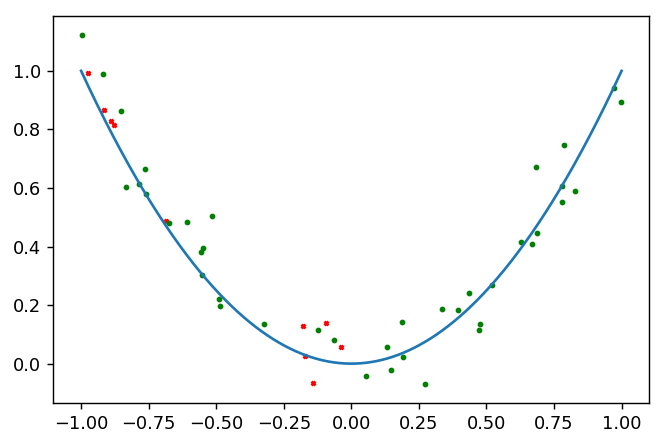

In [115]:
x = np.arange(-1, 1, 0.0001)
y = np.power(x, 2)

# training data
num_train = 10
ridx = list(np.random.randint(200, 4000, size=5)) + \
        list(np.random.randint(8000, 10000, size=5))
x_train, y_train = x[ridx], y[ridx] + np.random.normal(0, 0.1, size=num_train)

# testing data
num_test = 40
ridx = np.random.randint(len(x), size=num_test)
x_test, y_test = x[ridx], y[ridx] + np.random.normal(0, 0.1, size=num_test)

plt.figure(dpi=128)
plt.plot(x, y)
plt.scatter(x_train, y_train, color='red', marker='x', s=5)
plt.scatter(x_test, y_test, color='green', marker='o', s=5)

[[-0.07347389]
 [-1.00839704]]
[[0.06609033]
 [0.24519634]
 [1.2344719 ]]
[[ 0.08045326]
 [ 0.1462933 ]
 [-1.38250893]
 [-8.13224542]
 [-8.7476603 ]
 [-3.09965962]]


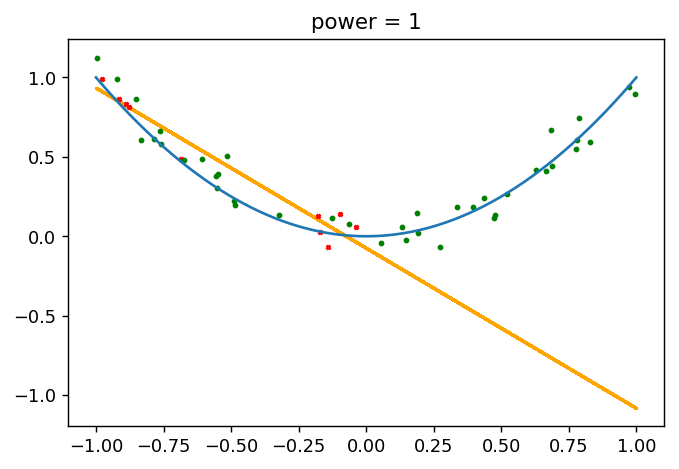

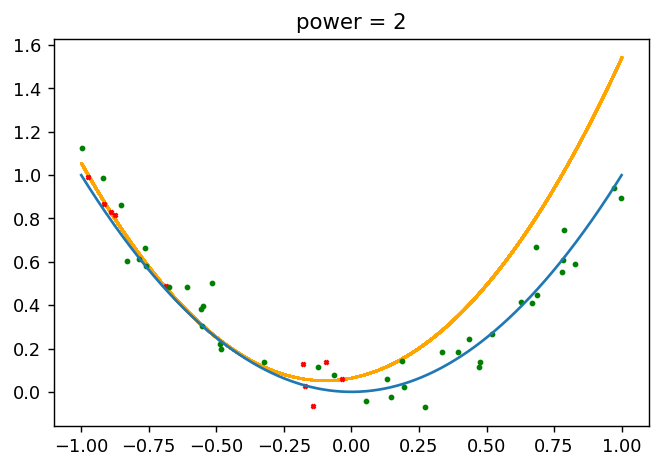

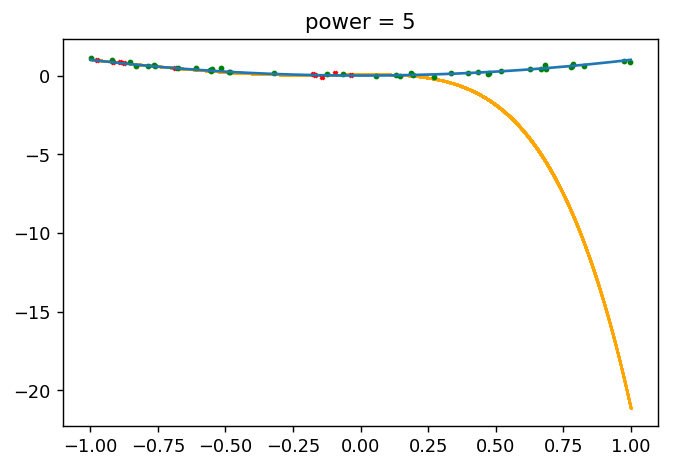

In [119]:
for power in [1, 2, 5]:
    x_poly = np.array([np.power(x, i) for i in range(power+1)]).T
    x_train_poly = np.array([np.power(x_train, i) for i in range(power+1)]).T

    theta = normal_equation(x_train_poly, y_train[:, np.newaxis])
    print(theta )
    y_ = theta.T.dot(x_poly.T).T

    plt.figure(dpi=128)
    plt.plot(x, y)
    plt.scatter(x, y_, color='orange', marker='.', s=0.5)
    plt.scatter(x_train, y_train, color='red', marker='x', s=5)
    plt.scatter(x_test, y_test, color='green', marker='o', s=5)
    plt.title('power = {}'.format(power))